In [ ]:
import pandas as pd
from pandas import Series

### 데이터 타입 변환

시리즈에 저장된 데이터가 문자열 타입으로 저장돼 있다고 가정해봅시다. 이러한 경우 덧셈 및 뺄셈 등의 연산을 적용할 수 없기 때문에 데이터 타입을 변경할 수 있어야 합니다. 

In [ ]:
s = Series(["100", "200", "300"])
print(s.dtype)

object


`astype` 메서드는 데이터의 타입을 변경합니다. 

In [ ]:

print(s.dtype)

object


만약 문자열 데이터에 콤마(`,`)가 파함돼 있다면 `astype` 메서드는 변환에 실패하고 에러 메시지를 출력합니다.   

In [ ]:
s = Series(["1,000", "2,000", "3,000"])
s.dtype
s.astype('int32')

ValueError: ignored

`ValueError: invalid literal for int() with base 10: '1,000'`

In [ ]:
# 비교
l = "1,000"
l = l.replace(",","")
l

'1000'

시리즈의 `replace` 메서드를 사용하면 데이터를 한 번에 치환할 수 있습니다. 

In [ ]:
s = Series(["1,000", "2,000", "3,000"])
s.replace(",", "")

0    1,000
1    2,000
2    3,000
dtype: object

`regex` 옵션을 추가하면 패턴을 검색한 후 치환을 시도합니다. (문자열의 replace와 이름은 동일하고 동작은 유사하지만 다른 클래스의 메서드입니다.)

In [ ]:
s = Series(["1,000", "2,000", "3,000"])
s.replace(",", "", regex=True) #regex=True 없으면 안됨. ~ 정규식을 사용하는 옵션임

0    1000
1    2000
2    3000
dtype: object

In [ ]:
s.replace("\d{3}","", regex=True)

0    1,
1    2,
2    3,
dtype: object

불필요한 데이터를 치환한 다음 타입을 변경합니다. 

In [ ]:
a = s.replace(",", "", regex=True).astype(np.int32)
a

0    1000
1    2000
2    3000
dtype: int32

In [ ]:
a+10

0    1010
1    2010
2    3010
dtype: int32

Q. Series에 저장된 값을 다음과 같이 변경하라. 

| index | values | 
| ---- | ---- |
| 0 | 38000 | 
| 1 | 28000 | 

In [ ]:
s = Series(["3만 8천", " 2만 8천"])
s = s.replace({"만 ":"", "천":"000"},regex=True).astype('int32')
# s = s.replace("만 ","",regex=True).replace("천", "000").astype('int32')
s

0    38000
1    28000
dtype: int32

In [ ]:
# 정규식 사용
s = Series(["3만 8천", "2만 8천"])
b = s.replace("\d","", regex=True) #숫자가 아닌 것을 ""로 치환
b

0    만 천
1    만 천
dtype: object

### 시리즈와 Map
시리즈를 사용하다 보면 시리즈가 지원하는 기본 연산 (덧셈, 뺄셈, 곱셈, 나눗셈) 이외에도 복잡한 형태의 사용자 정의 코드를 적용하고 싶은 경우가 있습니다. 예를 들어 시리즈에 저장된 성적을 학점으로 변경하기 위한 파이썬의 기본 함수는 없습니다. 사용자가 작성한 함수를 전체 시리즈에 적용하는 방법이 필요한데, 이를 `map` 함수로 해결합니다. 

In [ ]:
s = Series([3, 13, 23])
print(s)

0     3
1    13
2    23
dtype: int64


시리즈의 점수를 다음 조건의 학점으로 변경해 봅시다. 

| 점수구간 | 학점 |
| ---- | ---- |
| 20 - 29 | A |
| 10 - 19 | B |
| 0 - 9 | C |

In [ ]:
def f(x): #수치형 데이터를 범주형 데이터로 바꾼 것
    if x >= 20:
        return "A"
    elif x >= 10:
        return "B"
    else:
        return "C"
s.map(f) 
a = s.map(f)
a

0    C
1    B
2    A
dtype: object

`cut` 함수를 사용하면 더욱 쉽게 수치형 데이터를 범주형 데이터로 변환할 수 있습니다.   
- `bins`와 `labels` 옵션을 사용합니다. 

In [ ]:
pd.cut(s, [0,10,20,30]) # 결과에서 (포함 ]미포함

0     (0, 10]
1    (10, 20]
2    (20, 30]
dtype: category
Categories (3, interval[int64, right]): [(0, 10] < (10, 20] < (20, 30]]

In [ ]:
pd.cut(s, [0,10,20,30], labels=["C","B","A"]) # dtype : category <- 문자열보다 좀더 압축해서 표현가능

0    C
1    B
2    A
dtype: category
Categories (3, object): ['C' < 'B' < 'A']

Q. `map` 연산을 사용해서 시리즈에 저장된 값으로 학점을 판별하라.
- 90점 이상이면 A
- 70점 이상이면 B
- 나머지 F

연산 적용 결과
```
영수    A
철수    B
영희    F
```

In [ ]:
s = Series([94, 74, 30], index=['영수', '철수', '영희'])
def f(x): 
    if x >= 90:
        return "A"
    elif x >= 70:
        return "B"
    else:
        return "F"
a = s.map(f)
a

영수    A
철수    B
영희    F
dtype: object

In [ ]:
s = Series([94, 74, 30], index=['영수', '철수', '영희'])
pd.cut(s,[0,70,90,100], labels=["F","B","A"])

영수    A
철수    B
영희    F
dtype: category
Categories (3, object): ['F' < 'B' < 'A']

Q. `map` 연산을 사용해서 시리즈에 저장된 값에 다음 연산을 적용하라. 
- 0 이상 이면 값을 2배 키우고,
- 0 보다 작으면 값을 10 뺀다

연산 적용 결과
```
0    20
1     6
2   -13
dtype: int64
```

In [ ]:
s = Series([10, 3, -3])

In [ ]:
s = Series([10, 3, -3])
def miny(x):
    if x >= 0 :
        return x*2
    else:
        return x-10
a = s.map(miny)
a

0    20
1     6
2   -13
dtype: int64

In [ ]:
### Series 작동 원리
class MySeries:
    def __init__(self,data):
        self.data = data
    
    def __repr__(self):
        return f"{self.data}"
    
    def map(self, f):
        result =[]
        for v in self.data:
            result.append(f(v))
        return MySeries(result)
        # return result

def func(x):
    return x + 10

s = MySeries([100,200])
a = s.map(func)
type(a)

__main__.MySeries

#### 데이터 타입 더보기

In [ ]:
s = Series(["1,000", "2,000", "3,000"])

def f(x):
    # return x + "2222" # 이건 문자열이니까
    # return x.replace(",","") # 문자열이니까 replace도 쓸 수 있지
    return x.replace(",","")

s.map(f)

0    1000
1    2000
2    3000
dtype: object

#### 문자열에만 사용할 수 있는 방법

In [ ]:
s

0    1,000
1    2,000
2    3,000
dtype: object

In [ ]:
s.str[0]

0    1
1    2
2    3
dtype: object

In [ ]:
s.str[0:2]

0    1,
1    2,
2    3,
dtype: object

In [ ]:
%timeit s.str[0]+s.str[2:] # 반환결과 Series

1000 loops, best of 5: 550 µs per loop


In [ ]:
a=s.str[0]+s.str[2:]
a.astype(int)

0    1000
1    2000
2    3000
dtype: int64

In [ ]:
%timeit s.str.replace(",","")

The slowest run took 7.18 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 5: 171 µs per loop


### 시리즈 정렬
`sort_values` 메서드를 사용하면 쉽게 데이터를 정렬할 수 있습니다.  
- `ascending` 값에 따라 오름차순 혹은 내림차순으로 정렬됩니다. 

In [ ]:
from pandas import Series

data = [3.1, 2.0, 10.1, 5.1]
index = ["000010", "000020", "000030", "000040"]
s = Series(data=data, index=index)
s

000010     3.1
000020     2.0
000030    10.1
000040     5.1
dtype: float64

In [ ]:
s.sort_values() # 기본 : 오름차순

000020     2.0
000010     3.1
000040     5.1
000030    10.1
dtype: float64

In [ ]:
a = s.sort_values()
a[::-1] # 내림차순

000030    10.1
000040     5.1
000010     3.1
000020     2.0
dtype: float64

In [ ]:
b = [1,2,3]
b[::-1] # list에서 내림차순

[3, 2, 1]

In [ ]:
s.sort_values(ascending=False) # 내림차순

000030    10.1
000040     5.1
000010     3.1
000020     2.0
dtype: float64

`sort_index` 메서드는 인덱스를 기준으로 정렬합니다.

In [ ]:
s.sort_index

<bound method Series.sort_index of 000010     3.1
000020     2.0
000030    10.1
000040     5.1
dtype: float64>

In [ ]:
s.sort_index()

000010     3.1
000020     2.0
000030    10.1
000040     5.1
dtype: float64

In [ ]:
s.sort_index(ascending = False) #내림차순

000040     5.1
000030    10.1
000020     2.0
000010     3.1
dtype: float64

In [ ]:
s

000010     3.1
000020     2.0
000030    10.1
000040     5.1
dtype: float64

### 데이터 순위
`rank` 메서드는 순위를 측정합니다.

In [ ]:
s.rank() # 가장낮은값부터 1.0

000010    2.0
000020    1.0
000030    4.0
000040    3.0
dtype: float64

In [ ]:
s.rank().sort_values(ascending=False)

영수    3.0
철수    2.0
영희    1.0
dtype: float64

### 데이터 갯수 세기

시리즈에 저장된 데이터들의 출현 빈도를 세는 함수 `value_counts`

In [ ]:
Series(np.array([1,2,3]))

0    1
1    2
2    3
dtype: int64

In [ ]:
import numpy as np

new_s = Series(np.random.randint(10, size=100)) # 0~9 랜덤값 100개
new_s

0     1
1     5
2     9
3     3
4     5
     ..
95    4
96    9
97    8
98    6
99    4
Length: 100, dtype: int64

In [ ]:
new_s.unique()

array([1, 5, 9, 3, 0, 4, 2, 7, 6, 8])

In [ ]:
type(new_s.unique())
np.sort(new_s.unique())
# np array 의 sorting : https://rfriend.tistory.com/357

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
new_s.nunique() # 유니크한 개수 구해줌

10

In [ ]:
new_s.value_counts()

5    14
2    14
4    13
6    10
9     9
3     9
1     8
0     8
8     8
7     7
dtype: int64

In [ ]:
new_s.value_counts().sort_index()

0     8
1     8
2    14
3     9
4    13
5    14
6    10
7     7
8     8
9     9
dtype: int64

In [ ]:
!pip install pykrx

     |████████████████████████████████| 93 kB 1.8 MB/s 
     |████████████████████████████████| 51 kB 477 kB/s 
     |████████████████████████████████| 251 kB 45.7 MB/s 


In [ ]:
from pykrx import stock

In [ ]:
df = stock.get_market_ohlcv("20220101", "20220517", "105560")
df.head()

,시가,고가,저가,종가,거래량
날짜,,,,,
2022-01-03,54900,55700,54800,55300,635124
2022-01-04,55800,56400,55600,56400,927067
2022-01-05,56400,57100,55800,56600,1429634
2022-01-06,56600,56900,55500,55800,988985
2022-01-07,56000,56100,54800,55700,1193940


In [ ]:
# s = df.종가.values 이건 np array
s = df['종가']
s

날짜
2022-01-03    55300
2022-01-04    56400
2022-01-05    56600
2022-01-06    55800
2022-01-07    55700
              ...  
2022-05-11    56900
2022-05-12    57700
2022-05-13    58300
2022-05-16    58700
2022-05-17    58000
Name: 종가, Length: 91, dtype: int32

In [ ]:
type(s)

pandas.core.series.Series

In [ ]:
# Q. KB금융 주가의 평균보다 높은 날을 상승 낮은 날을 하락이라고 할 때 상승한 날은 개수

In [ ]:
s.mean()

59586.81318681319

In [ ]:
import matplotlib.pyplot as plt

up      47
down    43
Name: 종가, dtype: int64


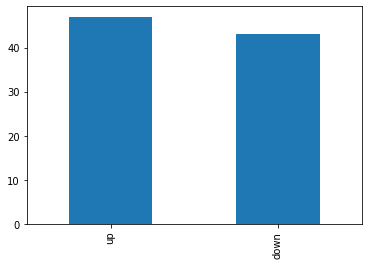

In [ ]:
newww = pd.cut(s, [s.min(),s.mean(),s.max()], labels=["down","up"])
print(newww.value_counts())
newww.value_counts().plot.bar()

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


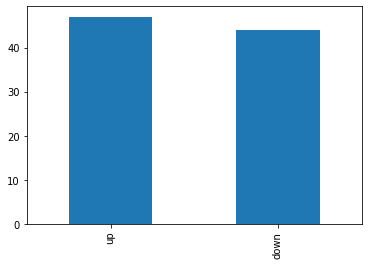

In [ ]:
cond = s > s.mean()
상승 = cond.sum()
하락 = len(s) - 상승

result = Series(  [상승, 하락] , index=["up", "down"]  )
result.plot.bar()

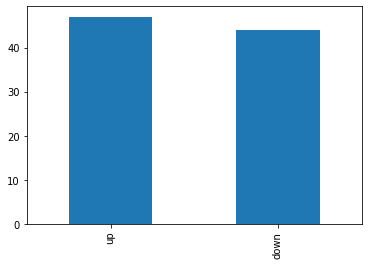

In [ ]:
sr = Series([s[s>s.mean()].count(),s[s<s.mean()].count()],["up","down"])
sr.plot.bar()